In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import datetime

Alameda_CO_full = pd.concat(map(pd.read_csv, ['gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Alameda/CO/2015.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Alameda/CO/2016.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Alameda/CO/2017.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Alameda/CO/2018.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Alameda/CO/2019.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Alameda/CO/2020.csv'])
, ignore_index=True)

In [3]:
import datetime
# the data is collected across multiple sites daily
# TODO: Consider the geographical distribution of the sites and their proximity to each other.
# this function calculates the daily average across all sites - Spatial aggregation
def calculate_daily_average(dataset, date_column, pollutant):
  # Ensure the date column is in datetime format
  dataset[date_column] = pd.to_datetime(dataset[date_column])
  dataset[date_column] = dataset[date_column].dt.date
  daily_avg = dataset.groupby(date_column)[pollutant].mean().reset_index()

  return daily_avg

In [4]:
Alameda_CO_full = calculate_daily_average(Alameda_CO_full, 'Date', 'Daily Max 8-hour CO Concentration')

In [5]:
# Some of the dataset contain missing dates
# this method finds those dates
def find_missing_dates(data, date_column):
  # Ensure the date column is in datetime format
  data[date_column] = pd.to_datetime(data[date_column])
  # Create a full range od dates
  min_date = data[date_column].min()
  max_date = data[date_column].max()
  full_dates = pd.date_range(start=min_date, end=max_date, freq='D')

  # Find missing dates
  missing_dates = full_dates.difference(data[date_column])

  return missing_dates

In [6]:
missing_dates = find_missing_dates(Alameda_CO_full, 'Date')

In [7]:
Alameda_NO2_full = pd.concat(map(pd.read_csv, ['gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Alameda/NO2/2015.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Alameda/NO2/2016.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Alameda/NO2/2017.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Alameda/NO2/2018.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Alameda/NO2/2019.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Alameda/NO2/2020.csv'])
, ignore_index=True)

In [8]:
Alameda_NO2_full = calculate_daily_average(Alameda_NO2_full, 'Date', 'Daily Max 1-hour NO2 Concentration')
missing_dates = find_missing_dates(Alameda_NO2_full, 'Date')
print(missing_dates)

DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [9]:
Alameda_Ozone_full = pd.concat(map(pd.read_csv, ['gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Alameda/Ozone/2015.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Alameda/Ozone/2016.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Alameda/Ozone/2017.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Alameda/Ozone/2018.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Alameda/Ozone/2019.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Alameda/Ozone/2020.csv'])
, ignore_index=True)

In [10]:
Alameda_Ozone_full = calculate_daily_average(Alameda_Ozone_full, 'Date', 'Daily Max 8-hour Ozone Concentration')
missing_dates = find_missing_dates(Alameda_Ozone_full, 'Date')
print(missing_dates)

DatetimeIndex(['2015-12-31', '2016-12-31', '2017-12-31', '2018-12-31',
               '2019-12-31'],
              dtype='datetime64[ns]', freq=None)


In [11]:
def process_data(data,  date_column, missing_dates):
  # Convert 'Date' column to datetime if it is not already
  data[date_column] = pd.to_datetime(data[date_column])

  # Set 'Date' as the index
  data.set_index(date_column, inplace=True)

  # Add the missing dates to the DataFrame with NaN values
  data = data.reindex(data.index.union(missing_dates))

  #Reset index to make 'Date' a regular column again
  data.reset_index(inplace=True)

  data.fillna(0, inplace=True)

  return data


In [12]:
Alameda_Ozone_full = process_data(Alameda_Ozone_full, 'Date', missing_dates)

In [13]:
# manually add 2020-12-31
new_entry = {'index': pd.to_datetime('2020-12-31'), 'Daily Max 8-hour Ozone Concentration': 0.0326668}
Alameda_Ozone_full.loc[len(Alameda_Ozone_full)] = new_entry

In [14]:
Alameda_Ozone_full.reset_index(drop=True, inplace=True)

In [15]:
Alameda_PM2_full = pd.concat(map(pd.read_csv, ['gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Alameda/PM2.5/2015.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Alameda/PM2.5/2016.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Alameda/PM2.5/2017.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Alameda/PM2.5/2018.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Alameda/PM2.5/2019.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Alameda/PM2.5/2020.csv'])
, ignore_index=True)

In [16]:
Alameda_PM2_full = calculate_daily_average(Alameda_PM2_full, 'Date', 'Daily Mean PM2.5 Concentration')
missing_dates = find_missing_dates(Alameda_PM2_full, 'Date')
print(missing_dates)

DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [17]:
Alameda_SO2_full = pd.concat(map(pd.read_csv, ['gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Alameda/SO2/2015.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Alameda/SO2/2016.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Alameda/SO2/2017.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Alameda/SO2/2018.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Alameda/SO2/2019.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Alameda/SO2/2020.csv'])
, ignore_index=True)

In [18]:
Alameda_SO2_full = calculate_daily_average(Alameda_SO2_full, 'Date', 'Daily Max 1-hour SO2 Concentration')
missing_dates = find_missing_dates(Alameda_SO2_full, 'Date')
print(missing_dates)

DatetimeIndex(['2015-05-05', '2015-05-06', '2015-05-20', '2015-11-14',
               '2015-11-15', '2015-12-09', '2016-05-26', '2016-06-30',
               '2016-07-01', '2016-07-14', '2016-07-15', '2016-07-16',
               '2016-07-17', '2016-07-30', '2016-07-31', '2016-08-01',
               '2016-08-02', '2016-08-30', '2016-08-31', '2016-09-01',
               '2016-09-12', '2016-09-13', '2016-09-21', '2016-09-22',
               '2016-11-04', '2016-11-05', '2016-11-06', '2016-11-07',
               '2016-11-08', '2016-11-09', '2016-11-29', '2016-12-23',
               '2016-12-24', '2016-12-25', '2016-12-26', '2016-12-27',
               '2017-01-13', '2017-01-31', '2017-02-03', '2017-02-04',
               '2017-02-05', '2017-02-06', '2017-05-08', '2017-05-09',
               '2017-05-10', '2017-05-23', '2017-06-11', '2017-06-12',
               '2017-06-13', '2017-06-14', '2017-07-19', '2017-08-03',
               '2017-08-04', '2017-08-21', '2017-08-22', '2017-09-21',
      

In [19]:
Alameda_SO2_full = process_data(Alameda_SO2_full, 'Date', missing_dates)

In [20]:
Alameda_CO_full.rename(columns = {'index':'Date'}, inplace = True)
Alameda_NO2_full.rename(columns = {'index':'Date'}, inplace = True)
Alameda_Ozone_full.rename(columns = {'index':'Date'}, inplace = True)
Alameda_PM2_full.rename(columns = {'index':'Date'}, inplace = True)
Alameda_SO2_full.rename(columns = {'index':'Date'}, inplace = True)

In [21]:
from functools import reduce
combine = reduce(lambda x,y: pd.merge(x,y, on='Date', how='outer'), [Alameda_CO_full,Alameda_NO2_full,Alameda_Ozone_full,Alameda_PM2_full,Alameda_SO2_full])

In [22]:
combine.head()

,Date,Daily Max 8-hour CO Concentration,Daily Max 1-hour NO2 Concentration,Daily Max 8-hour Ozone Concentration,Daily Mean PM2.5 Concentration,Daily Max 1-hour SO2 Concentration
0,2015-01-01,0.833333,32.200,0.030333,13.450,1.5
1,2015-01-02,1.066667,36.650,0.023000,22.475,5.6
2,2015-01-03,1.200000,36.475,0.018333,27.950,3.7
3,2015-01-04,1.533333,38.625,0.022667,31.125,2.1
4,2015-01-05,1.366667,44.000,0.022667,25.450,4.6


In [23]:
combine.rename(columns = {'Daily Max 8-hour CO Concentration':'CO', 'Daily Max 1-hour NO2 Concentration': 'NO2',
                          'Daily Max 8-hour Ozone Concentration': 'Ozone', 'Daily Mean PM2.5 Concentration': 'PM2.5',
                           'Daily Max 1-hour SO2 Concentration': 'SO2' }, inplace = True)

In [24]:
combine['COUNTY'] = 'Alameda'

In [25]:
combine

,Date,CO,NO2,Ozone,PM2.5,SO2,COUNTY
0,2015-01-01,0.833333,32.200000,0.030333,13.450000,1.5,Alameda
1,2015-01-02,1.066667,36.650000,0.023000,22.475000,5.6,Alameda
2,2015-01-03,1.200000,36.475000,0.018333,27.950000,3.7,Alameda
3,2015-01-04,1.533333,38.625000,0.022667,31.125000,2.1,Alameda
4,2015-01-05,1.366667,44.000000,0.022667,25.450000,4.6,Alameda
...,...,...,...,...,...,...,...
2187,2020-12-27,0.700000,20.716667,0.026000,7.333333,0.6,Alameda
2188,2020-12-28,0.620000,28.116667,0.029600,7.183333,0.3,Alameda
2189,2020-12-29,0.760000,30.550000,0.018200,8.683333,1.2,Alameda
2190,2020-12-30,0.860000,26.566667,0.024200,7.083333,1.1,Alameda


In [26]:
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"

In [27]:
# descriptive statistics of the data
print(combine.describe())

                CO          NO2        Ozone        PM2.5          SO2
count  2192.000000  2192.000000  2192.000000  2192.000000  2192.000000
mean      0.585745    21.641722     0.031998     9.713077     1.485812
std       0.236002     9.048738     0.008525    10.191217     2.049814
min       0.233333     4.375000     0.000000     1.425000    -0.100000
25%       0.425000    14.576667     0.027000     5.395000     0.400000
50%       0.500000    21.026667     0.031800     7.700000     0.900000
75%       0.700000    27.704167     0.037200    10.960000     1.825000
max       2.240000    63.916667     0.096333   168.716667    26.400000


In [28]:
# show intensity of each pollutant over time
fig = go.Figure()

for pollutant in ['CO', 'NO2', 'Ozone', 'PM2.5', 'SO2']:
  fig.add_trace(go.Scatter(x=combine['Date'], y=combine[pollutant], mode='lines',
                           name=pollutant))

fig.update_layout(title='Time Series Analysis of Air Pollutants in Alameda County',
                  xaxis_title='Date', yaxis_title='Concentration (ug/m3)')

fig.show()

In [29]:
#Calculate Air Quality Index
aqi_breakpoints = [
    (0, 12.0, 50), (12.1, 35.4, 100), (35.5, 55.4, 150),
    (55.5, 150.4, 200), (150.5, 250.4, 300), (250.5, 350.4, 400),
    (350.5, 500.4, 500)
]

def calculate_aqi(pollutant_name, concentration):
  for low, high, aqi in aqi_breakpoints:
    if low <= concentration <= high:
      return aqi
  return None

def calculate_overall_aqi(row):
  aqi_values = []
  pollutants = ['CO', 'NO2', 'Ozone', 'PM2.5', 'SO2']
  for pollutant in pollutants:
    aqi = calculate_aqi(pollutant, row[pollutant])
    if aqi is not None:
      aqi_values.append(aqi)
  return max(aqi_values)


# Calculate AQI for each row
combine['AQI'] = combine.apply(calculate_overall_aqi, axis=1)

# Define AQI categories
aqi_categories = [
    (0, 50, 'Good'), (51, 100, 'Moderate'), (101, 150, 'Unhealthy for Sensitive Groups'),
    (151, 200, 'Unhealthy'), (201, 300, 'Very Unhealthy'), (301, 500, 'Hazardous')
]

def categorize_aqi(aqi_value):
  for low, high, category in aqi_categories:
    if low <= aqi_value <= high:
      return category
  return None

In [30]:
#Categorize AQI
combine['AQI Category'] = combine['AQI'].apply(categorize_aqi)
print(combine.head())

        Date        CO     NO2     Ozone   PM2.5  SO2   COUNTY  AQI  \
0 2015-01-01  0.833333  32.200  0.030333  13.450  1.5  Alameda  100   
1 2015-01-02  1.066667  36.650  0.023000  22.475  5.6  Alameda  150   
2 2015-01-03  1.200000  36.475  0.018333  27.950  3.7  Alameda  150   
3 2015-01-04  1.533333  38.625  0.022667  31.125  2.1  Alameda  150   
4 2015-01-05  1.366667  44.000  0.022667  25.450  4.6  Alameda  150   

                     AQI Category  
0                        Moderate  
1  Unhealthy for Sensitive Groups  
2  Unhealthy for Sensitive Groups  
3  Unhealthy for Sensitive Groups  
4  Unhealthy for Sensitive Groups  


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns


asthma_data = pd.read_csv('gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/asthma-hospitalization-rates-by-county.csv', encoding="ISO-8859-1")

asthma_data['NUMBER OF HOSPITALIZATIONS'] = asthma_data['NUMBER OF HOSPITALIZATIONS'].str.replace(',', '').astype(float)

print(asthma_data.head())

       COUNTY  YEAR            STRATA STRATA NAME AGE GROUP  \
0  California  2015  Total population    All ages  All ages   
1     Alameda  2015  Total population    All ages  All ages   
2      Alpine  2015  Total population    All ages  All ages   
3      Amador  2015  Total population    All ages  All ages   
4       Butte  2015  Total population    All ages  All ages   

   NUMBER OF HOSPITALIZATIONS  AGE-ADJUSTED HOSPITALIZATION RATE COMMENT  
0                     27262.0                                7.0     NaN  
1                      1435.0                                9.3     NaN  
2                         0.0                                0.0     NaN  
3                        28.0                                7.5     NaN  
4                       143.0                                6.7     NaN  


In [32]:
combine

,Date,CO,NO2,Ozone,PM2.5,SO2,COUNTY,AQI,AQI Category
0,2015-01-01,0.833333,32.200000,0.030333,13.450000,1.5,Alameda,100,Moderate
1,2015-01-02,1.066667,36.650000,0.023000,22.475000,5.6,Alameda,150,Unhealthy for Sensitive Groups
2,2015-01-03,1.200000,36.475000,0.018333,27.950000,3.7,Alameda,150,Unhealthy for Sensitive Groups
3,2015-01-04,1.533333,38.625000,0.022667,31.125000,2.1,Alameda,150,Unhealthy for Sensitive Groups
4,2015-01-05,1.366667,44.000000,0.022667,25.450000,4.6,Alameda,150,Unhealthy for Sensitive Groups
...,...,...,...,...,...,...,...,...,...
2187,2020-12-27,0.700000,20.716667,0.026000,7.333333,0.6,Alameda,100,Moderate
2188,2020-12-28,0.620000,28.116667,0.029600,7.183333,0.3,Alameda,100,Moderate
2189,2020-12-29,0.760000,30.550000,0.018200,8.683333,1.2,Alameda,100,Moderate
2190,2020-12-30,0.860000,26.566667,0.024200,7.083333,1.1,Alameda,100,Moderate


In [33]:
combine['Date'] = pd.to_datetime(combine['Date'])
combine_yearly = combine.groupby(['COUNTY',combine['Date'].dt.year]).mean().reset_index()
combine_yearly.rename(columns = {'Date':'YEAR'}, inplace = True)
merged_data = pd.merge(asthma_data, combine_yearly, how='inner', left_on=['COUNTY', 'YEAR'], right_on=['COUNTY', 'YEAR'])
# Perform correlation analysis
correlation_matrix = merged_data[['NUMBER OF HOSPITALIZATIONS', 'CO', 'NO2', 'Ozone', 'PM2.5', 'SO2', 'AQI']].corr()

<ipython-input-33-28fbee1b0bae>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [34]:
merged_data

,COUNTY,YEAR,STRATA,STRATA NAME,AGE GROUP,NUMBER OF HOSPITALIZATIONS,AGE-ADJUSTED HOSPITALIZATION RATE,COMMENT,CO,NO2,Ozone,PM2.5,SO2,AQI
0,Alameda,2015,Total population,All ages,All ages,1435.0,9.3,NaN,0.567123,21.734904,0.033309,9.224132,2.090959,95.205479
1,Alameda,2015,Child vs. adult,017 years,017 years,611.0,17.0,NaN,0.567123,21.734904,0.033309,9.224132,2.090959,95.205479
2,Alameda,2015,Child vs. adult,18+ years,18+ years,824.0,6.7,NaN,0.567123,21.734904,0.033309,9.224132,2.090959,95.205479
3,Alameda,2015,Age groups,04 years,04 years,336.0,33.4,NaN,0.567123,21.734904,0.033309,9.224132,2.090959,95.205479
4,Alameda,2015,Age groups,517 years,517 years,275.0,11.0,NaN,0.567123,21.734904,0.033309,9.224132,2.090959,95.205479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Alameda,2020,Race/ethnicity,Hispanic,All ages,59.0,1.7,NaN,0.588497,20.982413,0.031540,10.985874,0.853552,96.994536
72,Alameda,2020,Race/ethnicity,Asian/PI,All ages,72.0,2.0,NaN,0.588497,20.982413,0.031540,10.985874,0.853552,96.994536
73,Alameda,2020,Race/ethnicity,AI/AN,All ages,NaN,NaN,Count and rate suppressed in accordance with d...,0.588497,20.982413,0.031540,10.985874,0.853552,96.994536
74,Alameda,2020,Race/ethnicity,NHPI,All ages,NaN,NaN,Count and rate suppressed in accordance with d...,0.588497,20.982413,0.031540,10.985874,0.853552,96.994536


In [35]:
print(correlation_matrix)

                            NUMBER OF HOSPITALIZATIONS        CO       NO2  \
NUMBER OF HOSPITALIZATIONS                    1.000000 -0.052226  0.033682   
CO                                           -0.052226  1.000000  0.811480   
NO2                                           0.033682  0.811480  1.000000   
Ozone                                         0.398447 -0.538059 -0.484454   
PM2.5                                        -0.121939  0.793985  0.637165   
SO2                                           0.460937 -0.255758 -0.077020   
AQI                                          -0.134364  0.891188  0.911540   

                               Ozone     PM2.5       SO2       AQI  
NUMBER OF HOSPITALIZATIONS  0.398447 -0.121939  0.460937 -0.134364  
CO                         -0.538059  0.793985 -0.255758  0.891188  
NO2                        -0.484454  0.637165 -0.077020  0.911540  
Ozone                       1.000000 -0.553345  0.832070 -0.744344  
PM2.5                      -0.

In [ ]:
# AQI over time
fig = px.bar(combine, x="Date", y="AQI",
             title="AQI of Alameda from 2015 - 2020")
fig.update_xaxes(title='Date')
fig.update_yaxes(title="AQI")
fig.show()

In [ ]:
# AQI Category distribution
fig = px.histogram(combine, x="Date",
                   color="AQI Category",
                   title="AQI Category Distribution Over Time")
fig.update_xaxes(title="Date")
fig.update_yaxes(title="Count")
fig.show()

In [ ]:
# Distribution of Pollutants in the air quality of Los Angeles
pollutants = ['CO', 'NO2', 'Ozone', 'PM2.5', 'SO2']
pollutant_colors = px.colors.qualitative.Plotly

# Calculate the sum of pollutant concentrations
total_concentrations = combine[pollutants].sum()

# Create a DataFrame for the concentrations
concentration_data = pd.DataFrame({
    "Pollutant": pollutants,
    "Concentration": total_concentrations
})

# Create a donut plot for pollutant concentrations
fig = px.pie(concentration_data, names="Pollutant", values="Concentration",
             title="Pollutant Concentrations in Alameda",
             hole=0.4, color_discrete_sequence=pollutant_colors)

# Update layout for the donut plot
fig.update_traces(textinfo="percent+label")
fig.update_layout(legend_title="Pollutant")

# Show the donut plot
fig.show()

In [ ]:
# Correlation Between Pollutants
correlation_matrix = combine[pollutants].corr()
fig = px.imshow(correlation_matrix, x=pollutants, y=pollutants, title="Correlation Between Pollutants")
fig.show()

In [36]:
# Correlation Between Pollutants and Number of Hospitalization
parameters = ['CO', 'NO2', 'Ozone', 'PM2.5', 'SO2', 'AQI', 'NUMBER OF HOSPITALIZATIONS']
correlation_matrix = merged_data[parameters].corr()
fig = px.imshow(correlation_matrix, x=parameters, y=parameters, title="Correlation Between Pollutants and No. of Hospitalization")
fig.show()

In [ ]:
combine['Day_of_Week'] = combine['Date'].dt.day_name()
average_aqi_by_day = combine.groupby('Day_of_Week')['AQI'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Create a line plot for daily trends in AQI
fig = px.bar(average_aqi_by_day, x=average_aqi_by_day.index, y="AQI",
              title="Average AQI by Day Trends in Alameda")
fig.update_xaxes(title="Day of the Week")
fig.update_yaxes(title="Average AQI")
fig.show()

In [ ]:
combine['Year'] = combine['Date'].dt.year
average_aqi_by_year = combine.groupby('Year')['AQI'].mean()

# Create a line plot for daily trends in AQI
fig = px.bar(average_aqi_by_year, x=average_aqi_by_year.index, y="AQI",
              title="Average AQI by Year Trends in Alameda")
fig.update_xaxes(title="Year")
fig.update_yaxes(title="Average AQI")
fig.show()

In [ ]:
import calendar
combine['Month'] = combine['Date'].dt.month.apply(lambda x: calendar.month_abbr[x])
average_aqi_by_month = combine.groupby('Month')['AQI'].mean()
# Create a line plot for daily trends in AQI
fig = px.bar(average_aqi_by_month, x=average_aqi_by_month.index, y="AQI",
              title="Average AQI by Month Trends in Alameda")
fig.update_xaxes(title="Months")
fig.update_yaxes(title="Average AQI")
fig.show()

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense

#Convert 'Date' to datetime and set it as the index
combine['Date'] = pd.to_datetime(combine['Date'])
combine.set_index('Date', inplace=True)

In [ ]:
# Feature Scaling
scaler = MinMaxScaler()
combine['AQI_scaled'] = scaler.fit_transform(combine['AQI'].values.reshape(-1,1))

In [ ]:
# Define sequence length and number of future time steps to predict
sequence_length = 30
#num_future_steps = 3 # Adjust according to needs

# function to create sequences for LSTM
def create_sequences(data, seq_length):
  X = []
  y = []
  for i in range(len(data) - seq_length):
    X.append(data[i:i+seq_length])
    y.append(data[i+seq_length])
  return np.array(X), np.array(y)

In [ ]:
 #Create sequences with multiple future time steps
X, y = create_sequences(combine['AQI_scaled'], sequence_length)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape data for LSTM input
#X_train = X_train.reshape((X_train.shape[0], sequence_length, len(target_variable)))
#X_test = X_test.reshape((X_test.shape[0], sequence_length, len(target_variable )))

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(units=1)) # Output layer with units equal to (num_future_steps * num_target_variables)

model.compile(optimizer='adam', loss='mse')

In [ ]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
44/44 [==============================] - 3s 24ms/step - loss: 0.0134 - val_loss: 0.0087
Epoch 2/20
44/44 [==============================] - 1s 17ms/step - loss: 0.0073 - val_loss: 0.0084
Epoch 3/20
44/44 [==============================] - 1s 19ms/step - loss: 0.0071 - val_loss: 0.0081
Epoch 4/20
44/44 [==============================] - 1s 17ms/step - loss: 0.0069 - val_loss: 0.0082
Epoch 5/20
44/44 [==============================] - 1s 27ms/step - loss: 0.0069 - val_loss: 0.0080
Epoch 6/20
44/44 [==============================] - 1s 27ms/step - loss: 0.0068 - val_loss: 0.0079
Epoch 7/20
44/44 [==============================] - 1s 27ms/step - loss: 0.0067 - val_loss: 0.0079
Epoch 8/20
44/44 [==============================] - 1s 27ms/step - loss: 0.0067 - val_loss: 0.0079
Epoch 9/20
44/44 [==============================] - 1s 26ms/step - loss: 0.0067 - val_loss: 0.0077
Epoch 10/20
44/44 [==============================] - 1s 26ms/step - loss: 0.0066 - val_loss: 0.0077
Epoch 11/

In [ ]:
# make predictions
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

14/14 [==============================] - 0s 8ms/step


In [ ]:
# evaluate the performance of the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(combine['AQI'][train_size+sequence_length:], predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 475.727416048521


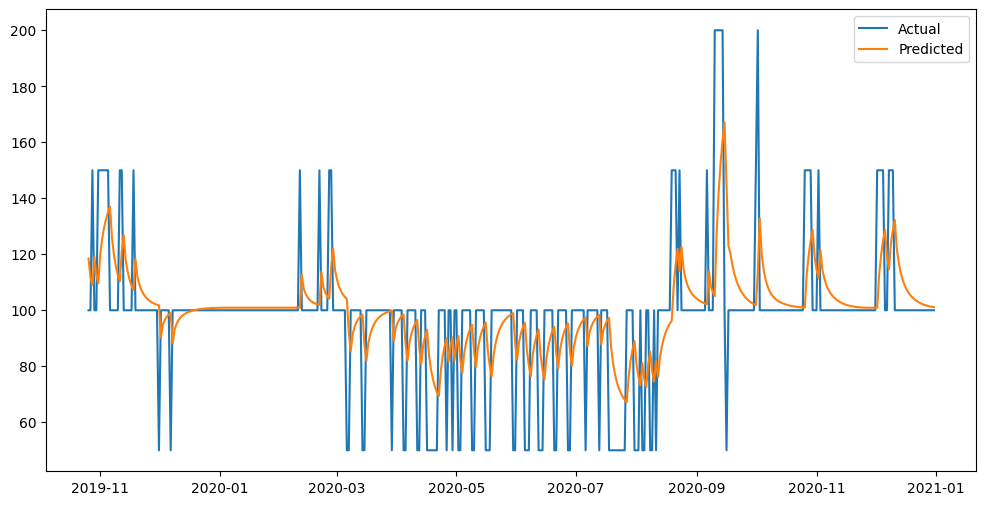

In [ ]:
# Visualize results
plt.figure(figsize=(12,6))
plt.plot(combine.index[train_size+sequence_length:], combine['AQI'][train_size+sequence_length:], label='Actual')
plt.plot(combine.index[train_size+sequence_length:], predictions, label='Predicted')
plt.legend()

In [ ]:
# Pollutant CO
combine['CO_scaled'] = scaler.fit_transform(combine['CO'].values.reshape(-1,1))

In [ ]:
#Create sequences with multiple future time steps
X_CO, y_CO = create_sequences(combine['CO_scaled'], sequence_length)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_CO_train, X_CO_test = X_CO[:train_size], X_CO[train_size:]
y_CO_train, y_CO_test = y_CO[:train_size], y_CO[train_size:]

In [ ]:
# Build the LSTM model
model2 = Sequential()
model2.add(LSTM(units=50, activation='relu', input_shape=(sequence_length, 1)))
model2.add(Dense(units=1)) # Output layer with units equal to (num_future_steps * num_target_variables)

model2.compile(optimizer='adam', loss='mse')

In [ ]:
X_CO_train = X_CO_train.reshape((X_CO_train.shape[0], X_CO_train.shape[1], 1))
# Train the model
model2.fit(X_CO_train, y_CO_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
44/44 [==============================] - 3s 23ms/step - loss: 0.0125 - val_loss: 0.0075
Epoch 2/20
44/44 [==============================] - 1s 17ms/step - loss: 0.0064 - val_loss: 0.0081
Epoch 3/20
44/44 [==============================] - 1s 17ms/step - loss: 0.0062 - val_loss: 0.0071
Epoch 4/20
44/44 [==============================] - 1s 18ms/step - loss: 0.0059 - val_loss: 0.0069
Epoch 5/20
44/44 [==============================] - 1s 18ms/step - loss: 0.0058 - val_loss: 0.0067
Epoch 6/20
44/44 [==============================] - 1s 18ms/step - loss: 0.0058 - val_loss: 0.0062
Epoch 7/20
44/44 [==============================] - 1s 17ms/step - loss: 0.0057 - val_loss: 0.0059
Epoch 8/20
44/44 [==============================] - 1s 17ms/step - loss: 0.0056 - val_loss: 0.0063
Epoch 9/20
44/44 [==============================] - 1s 18ms/step - loss: 0.0058 - val_loss: 0.0056
Epoch 10/20
44/44 [==============================] - 1s 17ms/step - loss: 0.0055 - val_loss: 0.0054
Epoch 11/

In [ ]:
# make predictions
X_CO_test = X_CO_test.reshape((X_CO_test.shape[0], X_CO_test.shape[1], 1))
predictionsCO = model2.predict(X_CO_test)
predictionsCO = scaler.inverse_transform(predictionsCO)

14/14 [==============================] - 0s 8ms/step


In [ ]:
# evaluate the performance of the model
mseCO = mean_squared_error(combine['CO'][train_size+sequence_length:], predictionsCO)
print(f'Mean Squared Error: {mseCO}')

Mean Squared Error: 0.019693274362578665


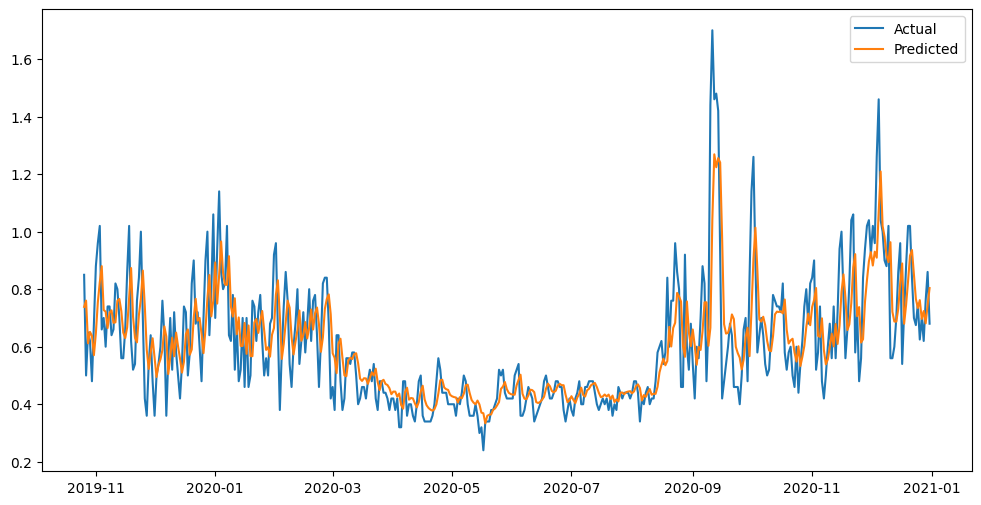

In [ ]:
# Visualize results
plt.figure(figsize=(12,6))
plt.plot(combine.index[train_size+sequence_length:], combine['CO'][train_size+sequence_length:], label='Actual')
plt.plot(combine.index[train_size+sequence_length:], predictionsCO, label='Predicted')
plt.legend()

In [ ]:
model2.save('Alameda-CO.keras')

In [ ]:
model.save('Alameda-AQI.keras')

In [ ]:
# Pollutant PM2.5
combine['PM2.5_scaled'] = scaler.fit_transform(combine['PM2.5'].values.reshape(-1,1))

In [ ]:
#Create sequences with multiple future time steps
X_PM, y_PM = create_sequences(combine['PM2.5_scaled'], sequence_length)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_PM_train, X_PM_test = X_PM[:train_size], X_PM[train_size:]
y_PM_train, y_PM_test = y_PM[:train_size], y_PM[train_size:]

In [ ]:
# Build the LSTM model
model3 = Sequential()
model3.add(LSTM(units=50, activation='relu', input_shape=(sequence_length, 1)))
model3.add(Dense(units=1)) # Output layer with units equal to (num_future_steps * num_target_variables)

model3.compile(optimizer='adam', loss='mse')

In [ ]:
X_PM_train = X_PM_train.reshape((X_PM_train.shape[0], X_PM_train.shape[1], 1))
# Train the model
model3.fit(X_PM_train, y_PM_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
44/44 [==============================] - 9s 49ms/step - loss: 0.0019 - val_loss: 0.0072
Epoch 2/20
44/44 [==============================] - 2s 36ms/step - loss: 0.0014 - val_loss: 0.0062
Epoch 3/20
44/44 [==============================] - 1s 32ms/step - loss: 0.0013 - val_loss: 0.0052
Epoch 4/20
44/44 [==============================] - 1s 30ms/step - loss: 0.0012 - val_loss: 0.0046
Epoch 5/20
44/44 [==============================] - 2s 35ms/step - loss: 0.0011 - val_loss: 0.0039
Epoch 6/20
44/44 [==============================] - 1s 32ms/step - loss: 0.0011 - val_loss: 0.0037
Epoch 7/20
44/44 [==============================] - 2s 47ms/step - loss: 9.8151e-04 - val_loss: 0.0035
Epoch 8/20
44/44 [==============================] - 2s 52ms/step - loss: 9.6959e-04 - val_loss: 0.0033
Epoch 9/20
44/44 [==============================] - 2s 44ms/step - loss: 9.0548e-04 - val_loss: 0.0034
Epoch 10/20
44/44 [==============================] - 2s 47ms/step - loss: 8.8246e-04 - val_loss: 

In [ ]:
# make predictions
X_PM_test = X_PM_test.reshape((X_PM_test.shape[0], X_PM_test.shape[1], 1))
predictionsPM = model3.predict(X_PM_test)
predictionsPM = scaler.inverse_transform(predictionsPM)

14/14 [==============================] - 0s 6ms/step


In [ ]:
# evaluate the performance of the model
msePM = mean_squared_error(combine['PM2.5'][train_size+sequence_length:], predictionsPM)
print(f'Mean Squared Error: {msePM}')

Mean Squared Error: 73.61096818829539


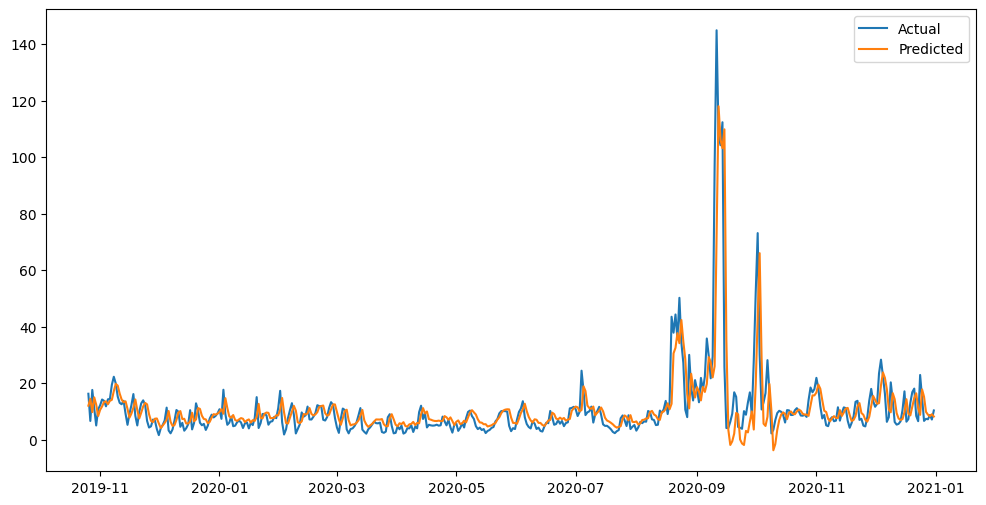

In [ ]:
# Visualize results
plt.figure(figsize=(12,6))
plt.plot(combine.index[train_size+sequence_length:], combine['PM2.5'][train_size+sequence_length:], label='Actual')
plt.plot(combine.index[train_size+sequence_length:], predictionsPM, label='Predicted')
plt.legend()

In [ ]:
model3.save('Alameda-PM2.5.keras')